In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [5]:
#Limiting the data to only Dodgers players

dodgers_data = master_data.loc[master_data["Franchise"] == "Dodgers"]

#Only showing players that signed with the Dodgers

signed_dodgers_data = dodgers_data.loc[dodgers_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_dodgers_data.groupby("Year")

#Unsigned Dodgers draft picks

unsigned_dodgers_data = dodgers_data.loc[dodgers_data["Signed"] == "N"]

In [6]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
2002    51.8
1988    49.5
1979    45.3
2003    41.4
2006    38.1
1981    36.7
1977    35.1
1966    31.3
1968    26.8
2012    24.3
1976    23.9
1993    23.7
2008    19.3
1978    19.1
1985    15.8
1999    15.5
2010    15.4
2013    13.7
1967    13.3
1989    12.6
1982    12.1
1984    10.7
1971    10.6
2015     8.9
2004     8.3
2001     6.7
1996     6.6
1974     6.5
1998     6.1
1987     5.9
2016     3.9
1969     3.8
1975     3.4
1994     3.1
1965     3.1
1991     2.5
1995     1.8
2000     1.8
2011     1.3
1970     0.8
1986     0.7
2014     0.6
1992     0.2
2005     0.1
2018     0.0
2009     0.0
2017     0.0
2019     0.0
1997    -0.5
2007    -0.5
1990    -0.7
1983    -0.9
1980    -0.9
1973    -1.5
1972    -2.8
Name: Total_WAR, dtype: float64

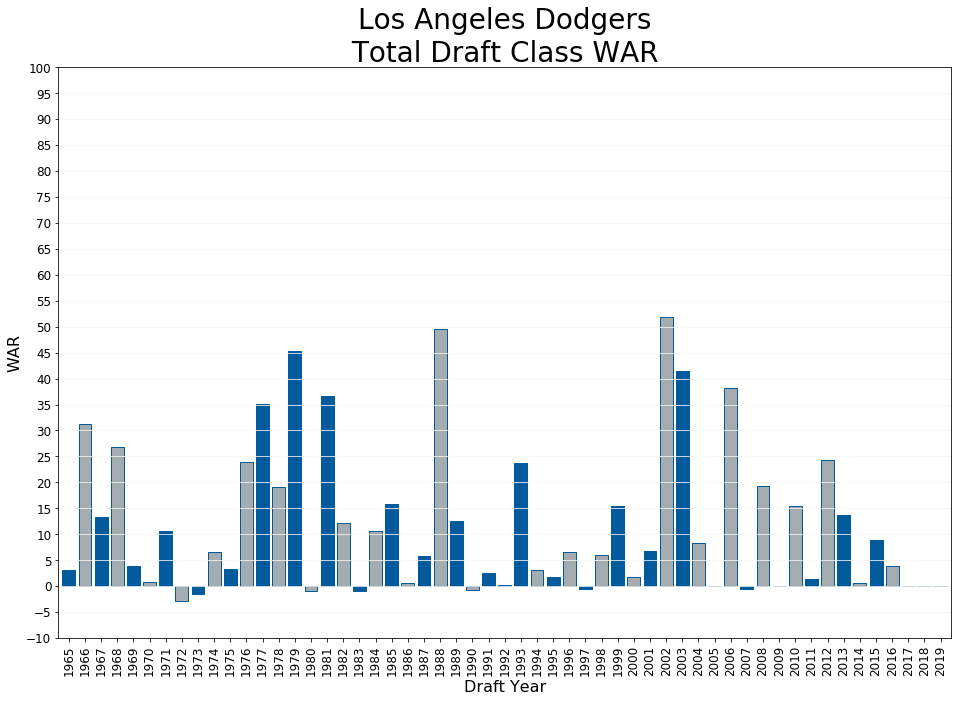

In [8]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#005A9C", "#A5ACAF"], width = .8, fontsize = 12, edgecolor = "#005A9C", figsize = (16, 10.5))
plt.title("Los Angeles Dodgers\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Dodgers WAR Total by Draft Year.png")
plt.show()

In [9]:
#Best draft picks in franchise history

signed_dodgers_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
47201,2006,1,7,Dodgers,Dodgers,Y,Clayton Kershaw,2008.0,kershcl01,2036.0,0.9,38.6,39.5,LHP,HS,Highland Park HS,University Park,TX,More than 25 WAR
20910,1988,62,1390,Dodgers,Dodgers,Y,Mike Piazza,1992.0,piazzmi01,893.0,39.5,0.0,39.5,1B,JC,Miami-Dade College,Miami,FL,More than 25 WAR
41744,2002,17,511,Dodgers,Dodgers,Y,Russell Martin,2006.0,martiru01,4616.0,31.0,0.0,31.0,2B,JC,Chipola College,Marianna,FL,More than 25 WAR
11922,1979,17,440,Dodgers,Dodgers,Y,Orel Hershiser,1983.0,hershor01,1005741.0,2.3,28.0,30.3,RHP,4Yr,Bowling Green State University,Bowling Green,OH,More than 25 WAR
42896,2003,6,181,Dodgers,Dodgers,Y,Matt Kemp,2006.0,kempma01,5631.0,21.5,0.0,21.5,OF,HS,Midwest City HS,Midwest City,OK,20-25 WAR
42739,2003,1,24,Dodgers,Dodgers,Y,Chad Billingsley,2006.0,billich01,5842.0,0.5,19.1,19.6,RHP,HS,Defiance HS,Defiance,OH,15-20 WAR
13257,1981,3,73,Dodgers,Dodgers,Y,Sid Fernandez,1983.0,fernasi01,1004001.0,2.0,16.4,18.4,LHP,HS,Kaiser HS,Honolulu,HI,15-20 WAR
56247,2012,1,18,Dodgers,Dodgers,Y,Corey Seager,2015.0,seageco01,13624.0,18.2,0.0,18.2,SS,HS,Northwest Cabarrus HS,Concord,NC,15-20 WAR
9948,1977,1,20,Dodgers,Dodgers,Y,Bob Welch,1978.0,welchbo01,1013750.0,-0.9,17.9,17.0,RHP,4Yr,Eastern Michigan University,Ypsilanti,MI,15-20 WAR
57591,2013,4,124,Dodgers,Dodgers,Y,Cody Bellinger,2017.0,bellico01,15998.0,15.4,0.0,15.4,1B,HS,Hamilton HS,Chandler,AZ,15-20 WAR


In [10]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_dodgers_data.loc[((signed_dodgers_data["WAR Group"] == "Less than 5 WAR") |
(signed_dodgers_data["WAR Group"] == "No Major League Experience")) & 
(signed_dodgers_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
7,1965,1,8,Dodgers,Dodgers,Y,John Wyatt,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Bakersfield HS,Bakersfield,CA,No Major League Experience
842,1966,1,19,Dodgers,Dodgers,Y,Larry Hutton,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Greenfield HS,Greenfield,IN,No Major League Experience
1674,1967,1,20,Dodgers,Dodgers,Y,Donnie Denbow,NaN,NaN,NaN,NaN,NaN,NaN,3B,4Yr,Southern Methodist University,Dallas,TX,No Major League Experience
2634,1968,1,5,Dodgers,Dodgers,Y,Bobby Valentine,1969.0,valenbo02,1013324.0,1.2,0.0,1.2,OF,HS,Rippowam HS,Stamford,CT,Less than 5 WAR
3549,1969,1,8,Dodgers,Dodgers,Y,Terry McDermott,1972.0,mcderte01,1008451.0,-0.3,0.0,-0.3,C,HS,St. Agnes HS,New York,NY,Less than 5 WAR
4592,1970,1,9,Dodgers,Dodgers,Y,Jim Haller,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Creighton Prep HS,Omaha,NE,No Major League Experience
6328,1972,1,17,Dodgers,Dodgers,Y,John Harbin,NaN,NaN,NaN,NaN,NaN,NaN,SS,4Yr,Newberry College,Newberry,SC,No Major League Experience
7120,1973,1,18,Dodgers,Dodgers,Y,Ted Farr,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Shadle Park HS,Spokane,WA,No Major League Experience
8560,1975,1,24,Dodgers,Dodgers,Y,Mark Bradley,1981.0,bradlma01,1001312.0,0.1,0.0,0.1,SS,HS,Elizabethtown HS,Elizabethtown,KY,Less than 5 WAR
11507,1979,1,25,Dodgers,Dodgers,Y,Steve Perry,NaN,NaN,NaN,NaN,NaN,NaN,RHP,4Yr,University of Michigan,Ann Arbor,MI,No Major League Experience


In [11]:
#Best unsigned draft picks in franchise history

unsigned_dodgers_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
192,1965,10,193,Dodgers,Dodgers,N,Tom Seaver,1967.0,seaveto01,1011708.0,2.2,43.9,46.1,RHP,4Yr,University of Southern California,Los Angeles,CA,More than 25 WAR
33846,1997,2,76,Dodgers,Dodgers,N,Chase Utley,2003.0,utleych01,1679.0,40.1,0.0,40.1,SS,HS,Polytechnic HS,Long Beach,CA,More than 25 WAR
48647,2006,49,1453,Dodgers,Dodgers,N,Paul Goldschmidt,2011.0,goldspa01,9218.0,31.1,0.0,31.1,1B,HS,The Woodlands HS,The Woodlands,TX,More than 25 WAR
44763,2004,19,568,Dodgers,Dodgers,N,David Price,2008.0,priceda01,3184.0,-0.1,24.4,24.3,LHP,HS,Blackman HS,Murfreesboro,TN,20-25 WAR
6664,1972,15,353,Dodgers,Dodgers,N,Jason Thompson,1976.0,thompja01,1013014.0,22.3,0.0,22.3,LHP,HS,Apple Valley HS,Apple Valley,CA,20-25 WAR
29353,1994,25,692,Dodgers,Dodgers,N,Randy Wolf,1999.0,wolfra02,976.0,1.9,15.9,17.8,LHP,HS,El Camino Real HS,Woodland Hills,CA,15-20 WAR
7313,1973,9,210,Dodgers,Dodgers,N,Bob Stanley,1977.0,stanlbo01,1012409.0,0.0,15.1,15.1,RHP,HS,Kearny HS,Kearny,NJ,15-20 WAR
30727,1995,13,359,Dodgers,Dodgers,N,Brad Wilkerson,2001.0,wilkebr01,804.0,13.2,0.0,13.2,LHP,HS,Apollo HS,Owensboro,KY,10-15 WAR
53376,2010,6,202,Dodgers,Dodgers,N,Kevin Gausman,2013.0,gausmke01,14107.0,-0.3,13.5,13.2,RHP,HS,Grandview HS,Aurora,CO,10-15 WAR
9913,1976,35,698,Dodgers,Dodgers,N,Scott Fletcher,1981.0,fletcsc01,1004155.0,12.7,0.0,12.7,SS,HS,Wadsworth HS,Wadsworth,OH,10-15 WAR


In [12]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_dodgers_data.loc[signed_dodgers_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
20910,1988,62,1390,Dodgers,Dodgers,Y,Mike Piazza,1992.0,piazzmi01,893.0,39.5,0.0,39.5,1B,JC,Miami-Dade College,Miami,FL,More than 25 WAR
41744,2002,17,511,Dodgers,Dodgers,Y,Russell Martin,2006.0,martiru01,4616.0,31.0,0.0,31.0,2B,JC,Chipola College,Marianna,FL,More than 25 WAR
11922,1979,17,440,Dodgers,Dodgers,Y,Orel Hershiser,1983.0,hershor01,1005741.0,2.3,28.0,30.3,RHP,4Yr,Bowling Green State University,Bowling Green,OH,More than 25 WAR
53526,2010,11,352,Dodgers,Dodgers,Y,Joc Pederson,2014.0,pederjo01,11899.0,13.1,0.0,13.1,CF,HS,Palo Alto HS,Palo Alto,CA,10-15 WAR
27631,1993,25,690,Dodgers,Dodgers,Y,Paul Lo Duca,1998.0,loducpa01,662.0,13.0,0.0,13.0,C,4Yr,Arizona State University,Tempe,AZ,10-15 WAR
1121,1966,15,299,Dodgers,Dodgers,Y,Ted Sizemore,1969.0,sizemte01,1012027.0,12.4,0.0,12.4,C,4Yr,University of Michigan,Ann Arbor,MI,10-15 WAR
22076,1989,43,1123,Dodgers,Dodgers,Y,Eric Young Sr.,1992.0,younger01,716.0,11.9,0.0,11.9,OF,4Yr,Rutgers the State University of New Jersey,New Brunswick,NJ,10-15 WAR
10509,1977,23,581,Dodgers,Dodgers,Y,Mitch Webster,1983.0,webstmi01,1013719.0,10.8,0.0,10.8,OF,HS,Larned HS,Larned,KS,10-15 WAR
50486,2008,11,337,Dodgers,Dodgers,Y,Nathan Eovaldi,2011.0,eovalna01,9132.0,-0.7,10.1,9.4,RHP,HS,Alvin HS,Alvin,TX,5-10 WAR
11818,1979,13,336,Dodgers,Dodgers,Y,Greg Brock,1982.0,brockgr01,1001455.0,8.7,0.0,8.7,1B,4Yr,University of Wyoming,Laramie,WY,5-10 WAR


In [13]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(dodgers_data["Year"], dodgers_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,43.3,56.7,0.0
1966,27.9,67.2,4.9
1967,11.6,73.9,14.5
1968,31.4,62.9,5.7
1969,25.6,62.8,11.6
1970,31.6,63.2,5.3
1971,16.7,72.9,10.4
1972,28.2,64.1,7.7
1973,18.2,81.8,0.0


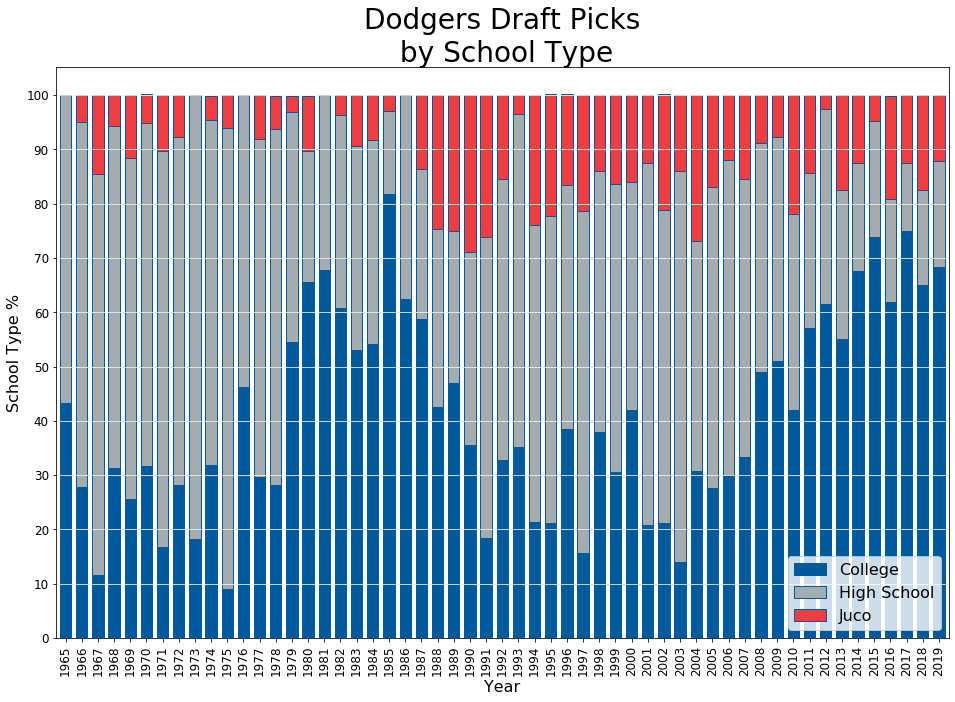

In [14]:
#Bar chart of table above

colors = ["#005A9C", "#A5ACAF", "#EF3E42"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#005A9C", stacked = True, figsize = (16, 10.5))
plt.title("Dodgers Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Dodgers Draft Picks by School Type.png")
plt.show()